In [187]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


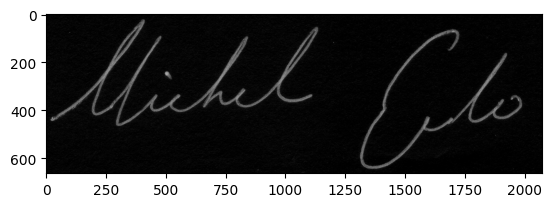

In [188]:
# Wczytaj obraz
img = cv2.imread('podpis3.png')

# Konwertuj na skalę szarości
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Odwróć kolory
inverted_gray = 255 - gray

# Konwertuj na RGB
inverted_rgb = cv2.cvtColor(inverted_gray, cv2.COLOR_GRAY2RGB)

# Wyświetl obraz
plt.imshow(inverted_rgb)
plt.show()

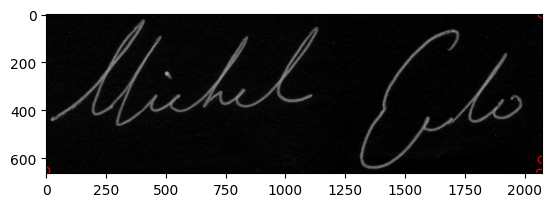

In [189]:
# Median blur for noise reduction
gray = cv2.medianBlur(gray,5)

# Adaptive thresholding
binary = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,2)

# Finding contours
contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create an empty array to store all the contour points
all_contours = np.concatenate(contours)

# Find extremities
leftmost = tuple(all_contours[all_contours[:,:,0].argmin()][0])
rightmost = tuple(all_contours[all_contours[:,:,0].argmax()][0])
topmost = tuple(all_contours[all_contours[:,:,1].argmin()][0])
bottommost = tuple(all_contours[all_contours[:,:,1].argmax()][0])

# Draw points on the image
cv2.circle(inverted_rgb, leftmost, 15, (0,0,255), 3)
cv2.circle(inverted_rgb, rightmost, 15, (0,0,255), 3)
cv2.circle(inverted_rgb, topmost, 15, (0,0,255), 3)
cv2.circle(inverted_rgb, bottommost, 15, (0,0,255), 3)

plt.imshow(cv2.cvtColor(inverted_rgb, cv2.COLOR_BGR2RGB))
plt.show()


Black/White pixel proportion:  0.10366216426419154


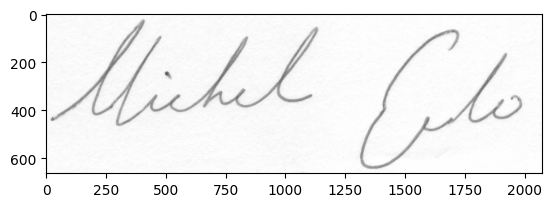

In [190]:
# Calculate white and black pixel proportion
total_pixels = binary.size
black_pixels = np.count_nonzero(binary)
white_pixels = total_pixels - black_pixels

proportion = black_pixels / white_pixels 

print('Black/White pixel proportion: ', proportion)

plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.show()

In [191]:
# Calculate distances
vertical_distance = np.sqrt((bottommost[0] - topmost[0])**2 + (bottommost[1] - topmost[1])**2)
horizontal_distance = np.sqrt((rightmost[0] - leftmost[0])**2 + (rightmost[1] - leftmost[1])**2)

print('Vertical distance: ', vertical_distance)
print('Horizontal distance: ', horizontal_distance)

Vertical distance:  663.0369522130724
Horizontal distance:  2072.510554858527


In [196]:
from skimage.morphology import skeletonize

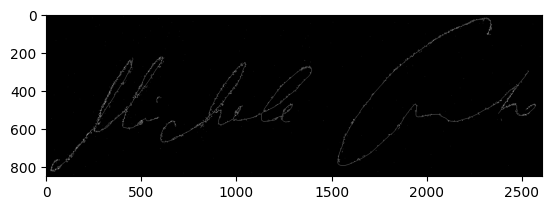

In [198]:
def read_image(image_path):

    image = cv2.imread(image_path)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    _, thresh = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY_INV)

    return thresh
def get_skeleton_iamge(threshold_image):
    skeleton = skeletonize(threshold_image / 255)
    skeleton = skeleton.astype(np.uint8)
    skeleton *= 255
    return skeleton


imagee = read_image('podpis4.png')
skeleton_image = get_skeleton_iamge(imagee)
plt.imshow(skeleton_image, cmap='gray')
plt.show()

In [199]:
from skimage.morphology import square
from skimage import morphology

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


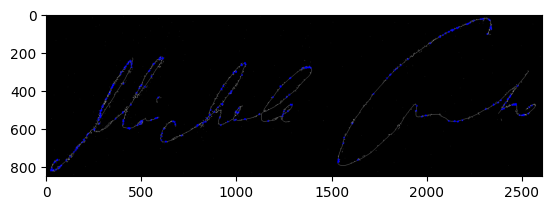

In [200]:
def detect_skeleton_corners(image_path):
    # Read the image
    image = skeleton_image

    # Apply Harris Corner Detection
    image = np.float32(image)
    dst = cv2.cornerHarris(image, blockSize=2, ksize=3, k=0.04)

    # Threshold the corner response
    threshold = 0.5 * dst.max()
    corners = np.where(dst > threshold)

    # Draw circles around the corners
    image_with_corners = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    for pt in zip(corners[1], corners[0]):
        cv2.circle(image_with_corners, pt, radius=3, color=(0, 0, 255), thickness=2)

    return image_with_corners

# Example usage
image_path = 'Q001.png'
image_with_corners = detect_skeleton_corners(image_path)

# Display the image with corners
plt.imshow(image_with_corners)
plt.show()